## Q2.1

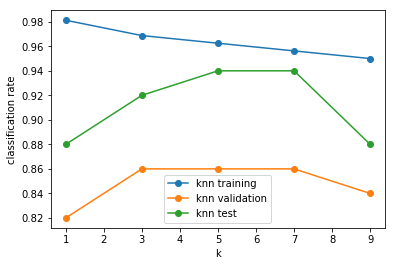

In [2]:
import matplotlib.pyplot as plt
from run_knn import run_knn
from utils import *

def run_knn_classifcation():
    train_inputs, train_targets = load_train()
    #train_inputs, train_targets = load_train_small()
    valid_inputs, valid_targets = load_valid()

    test_inputs, test_targets = load_test()

    # Initialize the array of k's
    k_arr = [1, 3, 5, 7, 9]
    performance_train = []
    performance = []
    performance_test = []

    # Predict labels of validation set using each k as hyperparameter
    for k in k_arr:
        predicted_labels = run_knn(k, train_inputs, train_targets, train_inputs)
        # Evaluate the performance on the trainning set
        performance_train.append(evaluate(train_targets, predicted_labels))
        
        predicted_labels = run_knn(k, train_inputs, train_targets, valid_inputs)
        # Evaluate the performance on the validation set
        performance.append(evaluate(valid_targets, predicted_labels))

        # Cheating now...
        predicted_labels = run_knn(k, train_inputs, train_targets, test_inputs)
        # Evaluate the performance on the test set
        performance_test.append(evaluate(test_targets, predicted_labels))

    # Plot the classification rates of training data with respect to the hyperparameters.
    plt.plot(k_arr, performance_train, "o-", label='knn training')
    # Plot the classification rates of validation set with respect to the hyperparameters.
    plt.plot(k_arr, performance, "o-", label='knn validation')
    # Plot the classification rates of test data with respect to the hyperparameters.
    plt.plot(k_arr, performance_test, "o-", label='knn test')

    plt.xlabel('k')
    plt.ylabel('classification rate')
    plt.legend()
    plt.show()

def evaluate(labels, predicted_labels):
    """
    Compute evaluation metric.
    Inputs:
        labels           : N x 1 vector of targets.
        predicted_labels : N x 1 vector of predicted labels.
    Outputs:
        frac_correct : (scalar) Fraction of inputs classified correctly.
    """
    correct_pred = labels == predicted_labels

    # Calculate the number of correct predictions
    correct_num = np.sum(correct_pred)

    # Calculate the percentage of correct predictions
    frac_correct = correct_num / float(correct_pred.shape[0])
    return frac_correct

%matplotlib inline
run_knn_classifcation()

### Comment
The best k I will choose is k = 5, since when k = 5, the classification rate of the validation set is at the maximum. Although at k = 3 and k = 7, the classification rates are at the maximum as well, but the classification rate drops immediately after k = 7 and before k = 3.

The classification rate on the test set is also at the maximum when k = 5, and the classification rate on the test set is higher than the validation set. This is because test set has more generality than the validation set, and validation set only describes parts of the data and thus has more bias